# Battle of Neighborhoods - Toronto (Week2)

## Finding Toronto areas not oversaturated with Indian restaurants

### Part 1 of 3 - Getting areas/localities with postal code, borough and neighborhoods
Step1 - Downloaded the html file with Toronto area codes to local drive

File path: C:\Kanishk Singh\HDD backup\Important Personal Docs\Professional Skills and Certifications\(wip) Data Science - IBM COURSERA\Session 9 - Capstone\List of postal codes of Canada_ M - Wikipedia.html

Step2 - Import the html file as pandas dataframe

In [1]:
import pandas as pd
df1 = pd.read_html(r"C:\Kanishk Singh\HDD backup\Important Personal Docs\Professional Skills and Certifications\(wip) Data Science - IBM COURSERA\Session 9 - Capstone\List of postal codes of Canada_ M - Wikipedia.html")
df2=df1[0]
df2.head(5)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Step3 - Ignore cells with a borough that is 'Not assigned'.

In [2]:
df2=df2[df2.Borough != 'Not assigned']
df2.reset_index(inplace=True)
df2.head()

,index,Postal Code,Borough,Neighborhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [3]:
df2.drop(labels='index',axis=1,inplace=True)
df2

C:\Users\kanis\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Step 4 - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

#### The dataset already fulfills this condition!

Step 5 - If a cell has a Borough but a "Not assigned" Neighborhood, then the Neighborhood will be the same as the borough.

In [4]:
df2.loc[df2['Neighborhood'] == 'Not assigned', 'Neighborhood'] = df2['Borough']
df2

C:\Users\kanis\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\kanis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Step 6 - Viewing shape of the data

In [5]:
df2.shape

(103, 3)

### Part 2 of 3 - Adding lat-long of neighborhoods
Step 7 - Retrieve coordinates of locations and add to the dataframe

In [6]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [7]:
# The code in this cell is returning 'None' instead of the coordinate values.
# So in the next cell we will use the csv containig lat-longs and will merge with our dataframe. 

'''
import geocoder

#### initialize your variable to None
lat_lng_coords = None

#### loop until you get the coordinates
for i in df2.index:
    while(lat_lng_coords is None):
        #g = geocoder.google(df2['Postal Code'][i] + ', Toronto, Ontario')
        g = geocoder.google('M3A, Toronto, Ontario')
        lat_lng_coords = g.latlng
        print (lat_lng_coords)
        #print (lat_lng_coords[0])
        #print (lat_lng_coords[1])
        #df2[['Latitude'][i]] = lat_lng_coords[0]
        #df2[['Longitude'][i]] = lat_lng_coords[1]
'''

"\nimport geocoder\n\n#### initialize your variable to None\nlat_lng_coords = None\n\n#### loop until you get the coordinates\nfor i in df2.index:\n    while(lat_lng_coords is None):\n        #g = geocoder.google(df2['Postal Code'][i] + ', Toronto, Ontario')\n        g = geocoder.google('M3A, Toronto, Ontario')\n        lat_lng_coords = g.latlng\n        print (lat_lng_coords)\n        #print (lat_lng_coords[0])\n        #print (lat_lng_coords[1])\n        #df2[['Latitude'][i]] = lat_lng_coords[0]\n        #df2[['Longitude'][i]] = lat_lng_coords[1]\n"

In [8]:
# Adding the lat-longs to the dataframe

df3= pd.read_csv(r"C:\Kanishk Singh\HDD backup\Important Personal Docs\Professional Skills and Certifications\(wip) Data Science - IBM COURSERA\Session 9 - Capstone\Geospatial_Coordinates.csv")
#df3.head()

df2 = df2.merge(df3,on='Postal Code')

df2

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


### Part 3 of 3 - Making API call to Foursquare to find  Toronto areas oversaturated with Indian resturants
Step 8 - Visualizing all neighborhoods basis Boroughs, each with a different color.

In [9]:
# Checking unique Boroughs and number of Neighborhoods within each
df2['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [10]:
# Generating map with different Boroughs clustered by different colors
import folium

Tor_map1 = folium.Map(location = [df2['Latitude'][0], df2['Longitude'][0]], zoom_start=11)

locations = df2[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

for point in df2.index:
    if df2['Borough'][point] == 'North York':
        folium.Marker(locationlist[point], popup=df2['Neighborhood'][point],icon=folium.Icon(color='purple',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'Downtown Toronto':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='lightgreen',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'Scarborough':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='lightred',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'Etobicoke':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='green',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'Central Toronto':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='orange',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'West Toronto':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='red',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'East Toronto':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='beige',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'York':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='blue',icon_color='#FFFF00')).add_to(Tor_map1)
    elif df2['Borough'][point] == 'East York':
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='lightred',icon_color='#FFFF00')).add_to(Tor_map1)
    else:
        folium.Marker(locationlist[point], popup=df2['Borough'][point],icon=folium.Icon(color='pink',icon_color='#FFFF00')).add_to(Tor_map1)

Tor_map1

Step 9 - Setting up parameters for the API call

In [11]:
import datetime
today = str (datetime.date.today())
today = today.replace('-','')
print (today)

20200619


In [12]:
str1= '''India
Punjab
Biryani
'''
query_list =str1.split()
print (len(query_list))

3


In [13]:
#Setting parameters for API call

CLIENT_ID = 'KBMVDAMHJCD13QHD0BI1THBYAQLMTQFLKJIVVUR4K2BCM4AU' # my Foursquare ID
CLIENT_SECRET = 'EBU1FTJTNJ0CQ3WS5DY3BTFEGWGNXIGEWXMVRLXYKLVJYUFA' # my Foursquare Secret
VERSION = today
LIMIT = 30
radius = 1000

import requests

Step 10:
Finding out total number of Indian restaurants in 1km radius of 103 Boroughs of Toronto. 
The resturants have been filtered by using 3 string phrases that are commonly used in the restuarant names/titles. Data has been wrangled where duplicates have been removed.
* The restaurants have been filtered by 3 phrases commonly found in Indian restaurant names/titles (due to limitation on API calls to Foursquare). 

In [14]:
list_IR= []
df_empty=pd.DataFrame(columns=['id','name'])

def list_modify(i,list_IR):
    for k in range (len (list_IR[i])-1):
        pd.concat([list_IR[i][0],list_IR[i][1]]).drop_duplicates().reset_index(drop=True)
        del list_IR[i][1]
    
for i in range(103):
    list_IR.append([])
    Lat_new= df2['Latitude'][i]
    Long_new=df2['Longitude'][i]
    #Lat_new=43.6572
    #Long_new=-79.3789
    for j in range(len(query_list)):
        url_new='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Lat_new, Long_new, VERSION,query_list[j], radius, LIMIT)
        results_new = requests.get(url_new).json()
        R_search_new = results_new['response']['venues']
        df_new = pd.json_normalize(R_search_new)
            
        if df_new.empty:
            list_IR[i].append(df_empty)
        else:
            #print (df_new.loc[:,['id','name']])
            list_IR[i].append(df_new.loc[:,['id','name']])
        
            
    list_modify(i,list_IR)
    
           
#df3 = pd.DataFrame(df,columns=['Postal Code','Borough','Neighborhood','Indian_Resto_Count','Saturated(y/n)'])


#print ("Total no. of Indian resturants in this area: ",rest_count)


Step 11 - Removing venues which are not restaurants. 
Getting count of Indian restaurants and determining areas with more than 2 restaurants in 1 km radius and labelling them 'y' in the saturated column.    

In [15]:
for i3 in range (103):
    list_IR[i3][0][~list_IR[i3][0].name.str.contains("services")]
    list_IR[i3][0][~list_IR[i3][0].name.str.contains("Services")]
    list_IR[i3][0][~list_IR[i3][0].name.str.contains("Bank")]
    list_IR[i3][0][~list_IR[i3][0].name.str.contains("bank")]


counts=[]


for i1 in range (103):
    counts.append(len (list_IR[i1][0].index))

df2['Count_Indian_Restaurants']= counts

df2


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Count_Indian_Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,3
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,5
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,9
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,5
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0


In [16]:
df2.describe()

,Latitude,Longitude,Count_Indian_Restaurants
count,103.000000,103.000000,103.00000
mean,43.704608,-79.397153,3.31068
std,0.052463,0.097146,5.35784
min,43.602414,-79.615819,0.00000
25%,43.660567,-79.464763,0.00000
50%,43.696948,-79.388790,1.00000
75%,43.745320,-79.340923,3.50000
max,43.836125,-79.160497,23.00000


In [17]:
saturation =[]
for i2 in range (103):
    if counts[i2]>3:
        saturation.append('y')
    else:
        saturation.append('n')

df2['Saturation']= saturation
df2
        

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Count_Indian_Restaurants,Saturation
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,n
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,n
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,5,y
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,n
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12,y
...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2,n
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,9,y
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,5,y
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0,n


Step 12 - Importing postal code wise population data of Toronto, downloaded from Canada Stats website.

In [18]:
df4 =pd.read_csv(r"C:\Kanishk Singh\HDD backup\Important Personal Docs\Professional Skills and Certifications\(wip) Data Science - IBM COURSERA\Session 9 - Capstone\Coursera_Capstone\T1201EN.CSV")
df4=df4.drop([0])
df4=df4[df4['Province or territory'] =='Ontario']
#df4=df4.reset_index()

#[0,2,3,4,6,7]
df4=df4.drop(columns=['Geographic name','Province or territory','Incompletely enumerated Indian reserves and Indian settlements, 2016','Total private dwellings, 2016','Private dwellings occupied by usual residents, 2016'])
df4=df4.rename(columns={"Geographic code":"Postal Code"})
df4
#df4=df4.iloc[:,[1,5]]

,Postal Code,"Population, 2016"
650,K0A,103474.0
651,K0B,20945.0
652,K0C,52154.0
653,K0E,38903.0
654,K0G,37097.0
...,...,...
1168,P7L,1942.0
1169,P8N,10048.0
1170,P8T,5002.0
1171,P9A,10651.0


In [55]:
df2=df2.merge(df4, on= "Postal Code",how='left')
#df2.dropna(how='any',inplace=True)
#df2=df2.drop(columns=['Population, 2016_x','Population, 2016_y'])
df2

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Count_Indian_Restaurants,Saturation,"Population, 2016"
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,n,34615.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,n,14443.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,5,y,41078.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,n,21048.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12,y,10.0
...,...,...,...,...,...,...,...,...
97,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2,n,10787.0
98,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,9,y,30472.0
99,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,5,y,10.0
100,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0,n,21299.0


Step 13 - The data indicates that more than ~25k people reside in 50% of the neighborhoods.

In [57]:
df2.describe()

,Latitude,Longitude,Count_Indian_Restaurants,"Population, 2016"
count,102.000000,102.000000,102.000000,102.000000
mean,43.705271,-79.395009,3.343137,26785.676471
std,0.052286,0.095146,5.374113,15160.057881
min,43.602414,-79.594054,0.000000,0.000000
25%,43.661782,-79.462654,0.000000,16717.000000
50%,43.700636,-79.388790,1.000000,24866.500000
75%,43.745613,-79.340923,3.750000,36933.000000
max,43.836125,-79.160497,23.000000,75897.000000


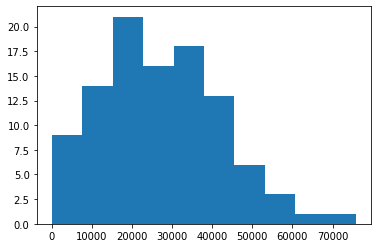

In [58]:
import matplotlib.pyplot as plt
plt.hist(df2['Population, 2016'])
plt.show()

Step 14 - Avg. of 27k population per area. So those areas which are not saturated with Indian restaurants and have population greater than 27k have good potential of driving the Indian restaurant business.
From the calculation we can see that there are 48 such neighborhoods.

In [62]:
df3=df2[(df2['Saturation']!='y')&(df2['Population, 2016']>27000)]
print (len(df3))

38


In [63]:
df3=df2[(df2['Saturation']!='y')&(df2['Population, 2016']>27000)]
df3.iloc[:,:3]

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
10,M6B,North York,Glencairn
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
13,M3C,North York,Don Mills
14,M4C,East York,Woodbine Heights
17,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe..."
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"


Step 15 - Checking no. of Indian restaurants around all 102 locations available in our list of areas/localities. 
Areas with lesser than 4 Indian restaurants and population over 27k will be highlighted with black marker on map.

In [64]:
latlat = df3['Latitude'][0]
longlong=df3['Longitude'][0]

Tor_map2 = folium.Map(location = [latlat,longlong], zoom_start=10)

for i in df3.index:
    folium.Marker([df3['Latitude'][i],df3['Longitude'][i]], icon=folium.Icon(color='black',icon_color='#FFFF00')).add_to(Tor_map2)
            
Tor_map2